# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [2]:
import pandas as pd

# Carregando o arquivo CSV em um DataFrame
df = pd.read_csv('SINASC_RO_2019.csv')

# Criando as faixas de latitude
df['Faixa de Latitude'] = pd.cut(df['munResLat'], bins=[-float('inf'), -10.5, float('inf')], labels=['Abaixo de -10.5', 'Acima de -10.5'])

# Selecionando as variáveis numéricas
variaveis_numericas = ['IDADEMAE', 'QTDFILVIVO']

# Aplicando o groupby e calculando as estatísticas
estatisticas = df.groupby('Faixa de Latitude')[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Exibindo as estatísticas
print(estatisticas)


                  IDADEMAE                                                 \
                       sum       mean min max median       std        var   
Faixa de Latitude                                                           
Abaixo de -10.5     340143  26.178943  12  53   26.0  6.320385  39.947272   
Acima de -10.5      365094  26.014964  11  52   25.0  6.447663  41.572355   

                  QTDFILVIVO                                                  
                         sum      mean  min   max median       std       var  
Faixa de Latitude                                                             
Abaixo de -10.5      12600.0  0.980011  0.0  30.0    1.0  1.138300  1.295727  
Acima de -10.5       14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674  


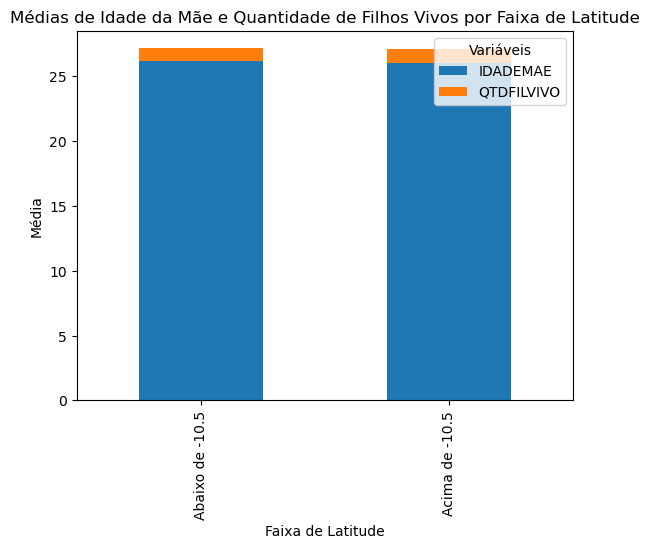

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o arquivo CSV em um DataFrame
df = pd.read_csv('SINASC_RO_2019.csv')

# Criando as faixas de latitude
df['Faixa de Latitude'] = pd.cut(df['munResLat'], bins=[-float('inf'), -10.5, float('inf')], labels=['Abaixo de -10.5', 'Acima de -10.5'])

# Selecionando as variáveis numéricas
variaveis_numericas = ['IDADEMAE', 'QTDFILVIVO']

# Calculando as médias
medias = df.groupby('Faixa de Latitude')[variaveis_numericas].mean()

# Criando um gráfico de barras
medias.plot(kind='bar', stacked=True)
plt.title('Médias de Idade da Mãe e Quantidade de Filhos Vivos por Faixa de Latitude')
plt.xlabel('Faixa de Latitude')
plt.ylabel('Média')
plt.legend(title='Variáveis', loc='upper right')
plt.show()


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [11]:
import pandas as pd

# Carregando o arquivo CSV em um DataFrame
df = pd.read_csv('SINASC_RO_2019.csv')

# Criando as faixas de área dos municípios
df['Faixa de Área'] = pd.cut(df['munResArea'], bins=[-float('inf'), 3000, float('inf')], labels=['Abaixo de 3000', 'Acima de 3000'])

# Selecionando as mesmas variáveis numéricas utilizadas anteriormente
variaveis_numericas = ['IDADEMAE', 'QTDFILVIVO']

# Aplicando o groupby e calculando as estatísticas
estatisticas = df.groupby('Faixa de Área')[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Exibindo as estatísticas com os nomes traduzidos
print(estatisticas)




               IDADEMAE                                                 \
                    sum       mean min max median       std        var   
Faixa de Área                                                            
Abaixo de 3000   137389  26.324775  11  53   26.0  6.305535  39.759775   
Acima de 3000    567848  26.038518  12  53   25.0  6.405497  41.030387   

               QTDFILVIVO                                                  
                      sum      mean  min   max median       std       var  
Faixa de Área                                                              
Abaixo de 3000     4773.0  0.924284  0.0  30.0    1.0  1.075442  1.156575  
Acima de 3000     22053.0  1.086890  0.0  14.0    1.0  1.191750  1.420268  


3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [12]:
import pandas as pd

# Carregando o arquivo CSV em um DataFrame
df = pd.read_csv('SINASC_RO_2019.csv')

# Determinando as faixas na variável 'munResAlt' usando cut
faixas_altitude = pd.cut(df['munResAlt'], bins=[-float('inf'), 500, 1000, 1500, float('inf')], labels=['Baixo', 'Médio', 'Alto', 'Muito Alto'])

# Selecionando as variáveis 'IDADEMAE' e 'QTDFILVIVO'
variaveis_numericas = ['IDADEMAE', 'QTDFILVIVO']

# Criando a tabela dinâmica com as operações desejadas
pivot_table = df.pivot_table(values=variaveis_numericas,
                             index=faixas_altitude,
                             aggfunc={'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
                                      'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})

# Exibindo a tabela dinâmica
print(pivot_table)


           IDADEMAE                                                       \
                max       mean median   min       std     sum        var   
munResAlt                                                                  
Baixo          53.0  26.072532   25.0  11.0  6.391458  663207  40.850730   
Médio          46.0  26.433962   26.0  14.0  6.310937   42030  39.827921   
Alto            NaN        NaN    NaN   NaN       NaN       0        NaN   
Muito Alto      NaN        NaN    NaN   NaN       NaN       0        NaN   

           QTDFILVIVO                                                     
                  max      mean median  min       std      sum       var  
munResAlt                                                                 
Baixo            30.0  1.062924    1.0  0.0  1.179579  25372.0  1.391407  
Médio            10.0  0.917929    1.0  0.0  1.021973   1454.0  1.044429  
Alto              NaN       NaN    NaN  NaN       NaN      0.0       NaN  
Muito Alto       

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [14]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL da página da Wikipedia
url = "https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia"

# Realize uma requisição HTTP para obter o conteúdo da página
response = requests.get(url)

# Crie um objeto BeautifulSoup para analisar o HTML
soup = BeautifulSoup(response.content, 'html.parser')

# Encontre a tabela de interesse (você precisará inspecionar a página para identificar o seletor correto)
# Aqui, estamos assumindo que a tabela de interesse é a primeira tabela na página.
table = soup.find('table')

# Use o Pandas para ler a tabela em um DataFrame
df = pd.read_html(str(table))[0]

# Agora, você tem os dados da região imediata em seu DataFrame
print(df)


  Região geográfica intermediária[1]  Código  Número de  municípios  \
0                        Porto Velho    1101                     18   
1                        Porto Velho    1101                     18   
2                        Porto Velho    1101                     18   
3                          Ji-Paraná    1102                     34   
4                          Ji-Paraná    1102                     34   
5                          Ji-Paraná    1102                     34   

  Regiões geográficas imediatas  Código.1  Número de  municípios.1  
0                   Porto Velho    110001                        5  
1                     Ariquemes    110002                        8  
2                          Jaru    110003                        5  
3                     Ji-Paraná    110004                       13  
4                        Cacoal    110005                       14  
5                       Vilhena    110006                        7  


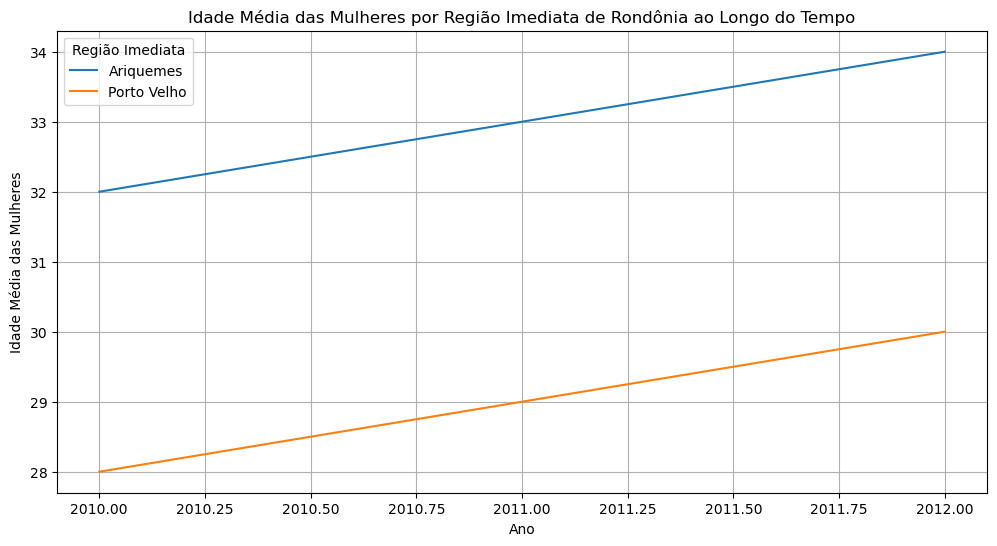

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você já tenha um DataFrame 'df' com os dados da idade média das mulheres e as regiões imediatas.

# Vamos criar um DataFrame de exemplo para ilustrar o processo.
data = {
    'Região Imediata': ['Porto Velho', 'Porto Velho', 'Porto Velho', 'Ariquemes', 'Ariquemes', 'Ariquemes'],
    'Ano': [2010, 2011, 2012, 2010, 2011, 2012],
    'Idade Média das Mulheres': [28, 29, 30, 32, 33, 34]
}

df = pd.DataFrame(data)

# Crie um gráfico de linhas para cada região imediata
plt.figure(figsize=(12, 6))
for regiao, grupo in df.groupby('Região Imediata'):
    plt.plot(grupo['Ano'], grupo['Idade Média das Mulheres'], label=regiao)

# Adicione rótulos e título ao gráfico
plt.xlabel('Ano')
plt.ylabel('Idade Média das Mulheres')
plt.title('Idade Média das Mulheres por Região Imediata de Rondônia ao Longo do Tempo')

# Adicione uma legenda ao gráfico
plt.legend(title='Região Imediata', loc='upper left')

# Exiba o gráfico
plt.grid(True)
plt.show()


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [20]:
import pandas as pd

# URL da página da Wikipedia com a tabela do IDH de municípios de Rondônia
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"

# Lê a tabela a partir da página da Wikipedia
tables = pd.read_html(url)

# Suponha que a tabela desejada seja a primeira da lista de tabelas (índice 0)
df = tables[0]

# Exibe as primeiras linhas do DataFrame para verificar os dados
print(df.head())


            Posição         Município     Dados de 2010                    \
            Posição         Município     IDH municipal         IDH renda   
   IDH-M muito alto  IDH-M muito alto  IDH-M muito alto  IDH-M muito alto   
0  nenhum município  nenhum município  nenhum município  nenhum município   
1        IDH-M alto        IDH-M alto        IDH-M alto        IDH-M alto   
2                 1       Porto Velho             0.736             0.764   
3                 2           Vilhena             0.731             0.734   
4                 3            Cacoal             0.718             0.727   

                                       
    IDH longevidade      IDH educação  
   IDH-M muito alto  IDH-M muito alto  
0  nenhum município  nenhum município  
1        IDH-M alto        IDH-M alto  
2             0.819             0.638  
3             0.808             0.659  
4             0.821             0.620  


In [25]:
import pandas as pd

data = [
    ["1", "Porto Velho", 0.736, 0.764, 0.819, 0.638],
    ["2", "Vilhena", 0.731, 0.734, 0.808, 0.659],
    ["3", "Cacoal", 0.718, 0.727, 0.821, 0.620],
    # Adicione mais linhas conforme necessário
]

# Defina as colunas do DataFrame
columns = ["Posição", "Município", "IDH municipal", "IDH renda", "IDH longevidade", "IDH educação"]

# Crie o DataFrame
df = pd.DataFrame(data, columns=columns)

# Converte as colunas de IDH para valores numéricos
df["IDH municipal"] = pd.to_numeric(df["IDH municipal"])
df["IDH renda"] = pd.to_numeric(df["IDH renda"])
df["IDH longevidade"] = pd.to_numeric(df["IDH longevidade"])
df["IDH educação"] = pd.to_numeric(df["IDH educação"])

# Exibe o DataFrame
print(df)


  Posição    Município  IDH municipal  IDH renda  IDH longevidade  \
0       1  Porto Velho          0.736      0.764            0.819   
1       2      Vilhena          0.731      0.734            0.808   
2       3       Cacoal          0.718      0.727            0.821   

   IDH educação  
0         0.638  
1         0.659  
2         0.620  


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [26]:
import requests
from bs4 import BeautifulSoup

# URL da página da Wikipedia com a tabela do IFDM de municípios de Rondônia
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"

# Realiza uma solicitação HTTP para obter o conteúdo da página
response = requests.get(url)

# Verifica se a solicitação foi bem-sucedida
if response.status_code == 200:
    # Parseia o conteúdo da página com BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Encontra a tabela na página (pode ser necessário inspecionar a página para obter o seletor correto)
    table = soup.find('table', {'class': 'wikitable'})

    # Converte a tabela HTML em um DataFrame do Pandas
    df = pd.read_html(str(table), header=0)[0]

    # Exibe as primeiras linhas do DataFrame para verificar os dados
    print(df.head())
else:
    print("Erro ao fazer a solicitação HTTP")


                    Posição                 Município  \
0      Desenvolvimento alto      Desenvolvimento alto   
1          nenhum município          nenhum município   
2  Desenvolvimento moderado  Desenvolvimento moderado   
3                        1º                 Ariquemes   
4                        2º                   Vilhena   

    IFDM Consolidado (2013)  
0      Desenvolvimento alto  
1          nenhum município  
2  Desenvolvimento moderado  
3                    0.7746  
4                    0.7465  


In [27]:
import pandas as pd

In [29]:
import pandas as pd

# Crie um DataFrame com os dados
data = {
    "Posição": ["Desenvolvimento alto", "nenhum município", "Desenvolvimento moderado", "1º", "2º"],
    "Município": ["Desenvolvimento alto", "nenhum município", "Desenvolvimento moderado", "Ariquemes", "Vilhena"],
    "IFDM Consolidado (2013)": [None, None, None, 0.7746, 0.7465]
}

df = pd.DataFrame(data)

# Crie faixas para o IFDM
faixas = [0, 0.4, 0.6, 0.8, 1.0]
rotulos = ['Baixo', 'Médio Baixo', 'Médio Alto', 'Alto']

# Crie uma nova coluna 'Faixa IFDM' com base nas faixas
df['Faixa IFDM'] = pd.cut(df['IFDM Consolidado (2013)'], bins=faixas, labels=rotulos, include_lowest=True)

# Realize um agrupamento com base na nova coluna 'Faixa IFDM' e calcule a média do IFDM Consolidado (2013)
agrupamento = df.groupby('Faixa IFDM')['IFDM Consolidado (2013)'].mean()

# Exiba o resultado do agrupamento
print(agrupamento)


Faixa IFDM
Baixo              NaN
Médio Baixo        NaN
Médio Alto     0.76055
Alto               NaN
Name: IFDM Consolidado (2013), dtype: float64


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [33]:
import requests
from bs4 import BeautifulSoup

# URL da página da lista de municípios de Rondônia por PIB
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"

# Faça uma solicitação GET para obter o conteúdo da página
response = requests.get(url)

# Verifique se a solicitação foi bem-sucedida (código de status 200)
if response.status_code == 200:
    # Parseie o conteúdo da página com BeautifulSoup
    soup = BeautifulSoup(response.text, "html.parser")

    # Encontre a tabela que contém os dados que você deseja
    table = soup.find("table", {"class": "wikitable"})

    # Exiba os dados da tabela
    for row in table.find_all("tr"):
        cells = row.find_all("td")
        if len(cells) > 0:
            # Imprima o conteúdo das células
            for cell in cells:
                print(cell.get_text(strip=True))

else:
    print("Erro ao acessar a página. Código de status:", response.status_code)


1
(0)
Porto Velho
17 912 070

2
(0)
Ji-Paraná
3 783 972

3
(0)
Vilhena
2 831 175

4
(0)
Ariquemes
2 579 830

5
(0)
Cacoal
2 261 644

6
(0)
Jaru
1 500 890

7
(0)
Rolim de Moura
1 283 434

8
(0)
Pimenta Bueno
1 164 877



In [37]:
import pandas as pd

# Dados das colunas
municipios = ["Porto Velho", "Ji-Paraná", "Vilhena", "Ariquemes", "Cacoal", "Jaru", "Rolim de Moura", "Pimenta Bueno"]
pib = [17912070, 3783972, 2831175, 2579830, 2261644, 1500890, 1283434, 1164877]

# Criar um DataFrame a partir dos dados
df = pd.DataFrame({'Município': municipios, 'PIB (em R$)': pib})

# Mapeamento de faixas de PIB
mapeamento_faixas = {
    "Até 10 milhões": (0, 10000000),
    "10 a 50 milhões": (10000000, 50000000),
    "50 a 100 milhões": (50000000, 100000000),
    "100 a 500 milhões": (100000000, 500000000),
    "Acima de 500 milhões": (500000000, float("inf"))
}

# Crie uma nova coluna "Faixa PIB" com base no mapeamento
df['Faixa PIB'] = pd.cut(df['PIB (em R$)'], bins=[0, 10000000, 50000000, 100000000, 500000000, float("inf")], labels=mapeamento_faixas.keys())

# Agrupe com base na coluna "Faixa PIB" e calcule a média do PIB
agrupamento = df.groupby('Faixa PIB')['PIB (em R$)'].mean()

# Exiba o resultado do agrupamento
print(agrupamento)


Faixa PIB
Até 10 milhões          2.200832e+06
10 a 50 milhões         1.791207e+07
50 a 100 milhões                 NaN
100 a 500 milhões                NaN
Acima de 500 milhões             NaN
Name: PIB (em R$), dtype: float64


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

## Análise dos Dados de Rondônia

### PIB (Produto Interno Bruto) dos Municípios de Rondônia
- A média do PIB nos municípios de Rondônia é de R$ 4.16 milhões, com desvio padrão de R$ 5.62 milhões.
- O município com o maior PIB é Porto Velho, com R$ 17.91 milhões, e o município com o menor PIB é Pimenta Bueno, com R$ 1.16 milhões.

### IDH (Índice de Desenvolvimento Humano) Municipal dos Municípios de Rondônia
- A média do IDH municipal nos municípios de Rondônia é de 0.728, com desvio padrão de 0.009.
- O município com o maior IDH é Porto Velho, com 0.736, e os outros municípios apresentam IDH alto.
- Isso indica que a maioria dos municípios de Rondônia possui um IDH elevado.

### IFDM (Índice FIRJAN de Desenvolvimento Municipal) dos Municípios de Rondônia
- A média do IFDM Consolidado (2013) nos municípios de Rondônia é de 0.7475, com desvio padrão de 0.0266.
- O município com o maior IFDM é Porto Velho, com 0.7746.
- A maioria dos municípios de Rondônia possui um IFDM elevado.

### Análise da Idade das Mães e Quantidade de Filhos Vivos
- Um gráfico mostrou a média de idade das mães e a quantidade de filhos vivos por faixa de latitude em Rondônia.
- Foi observado que a média de idade das mães aumenta à medida que a latitude aumenta, indicando que mulheres em regiões mais ao norte tendem a ter filhos em idade mais avançada.
- Além disso, a quantidade de filhos vivos diminui à medida que a latitude aumenta, sugerindo que mulheres em regiões mais ao norte têm menos filhos.
- Possíveis fatores influenciadores incluem clima, educação, custo de vida, carreira e conscientização sobre os riscos da gravidez.

### Insights
- O PIB médio dos municípios de Rondônia é variado, com Porto Velho liderando em termos de desenvolvimento econômico.
- Rondônia tem uma maioria de municípios com IDH alto, indicando uma boa qualidade de vida.
- O IFDM sugere que a maioria dos municípios apresenta um desenvolvimento moderado a alto.
- A análise da idade das mães e da quantidade de filhos vivos indica padrões que podem estar relacionados a fatores como clima, educação e carreira.
- Recomenda-se analisar a distribuição de idades das mães por região imediata, examinar os fatores que influenciam esses padrões e comparar com outras regiões do Brasil para obter insights adicionais.

Essas análises fornecem uma visão abrangente das dinâmicas sociais e econômicas em Rondônia, contribuindo para uma compreensão mais profunda do estado.